In [1]:
#!pip install imageio

 # 🎓 Задание: «Работа с изображением как с NumPy-массивом»

> **Цель**: Отработать ключевые операции NumPy — срезы, слои, broadcasting, транслирование — на реальном примере изображения.  
> **Ограничение**: Использовать `matplotlib.pyplot` только для команды `plt.imshow()` — чтобы показать результат.

## 📥1: Загрузите изображение

### Задание 1.1: Загрузите изображение

Используйте любое цветное изображение на свое усмотрение.  
Загрузите его в массив NumPy двуся способами с  `imageio` (рекомендовано) и  `PIL`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Вариант 1: через imageio (рекомендуется)
import imageio.v3 as iio
img = iio.imread('Machinarium.jpg')

print("Форма изображения:", img.shape)  # прооверьте

Форма изображения: (1242, 2208, 3)


In [3]:
# Вариант 2: через PIL
from PIL import Image
img_PIL = np.array(Image.open('Machinarium.jpg'))

print("Форма изображения:", img_PIL.shape)  # прооверьте

Форма изображения: (1242, 2208, 3)


## ✂️ 2: Срезы и слои (оси)

### Задание 2.1: Выведите отдельные цветовые каналы

- Создайте три новых массива: только красный канал, только зелёный, только синий.
- Покажите каждый канал как отдельное изображение (остальные каналы = 0).

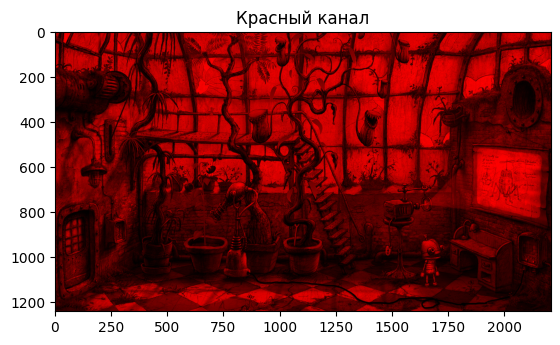

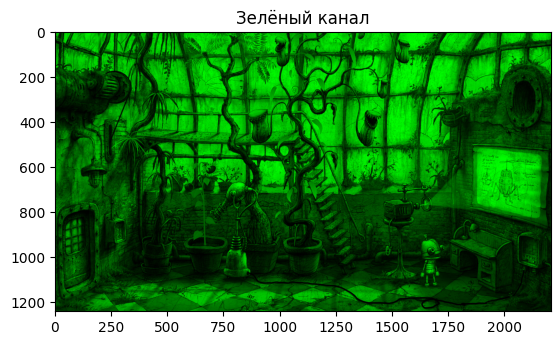

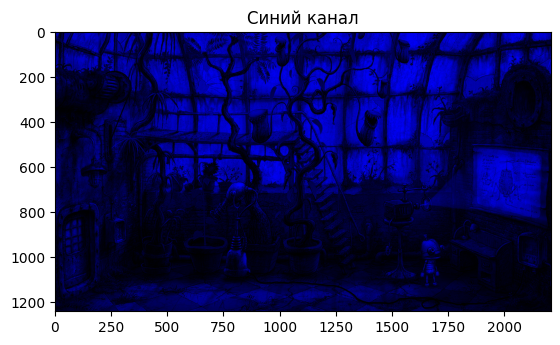

In [4]:
def showOneChannel(channel, title):
    channel_img = img.copy()
    channel_img[:, :, (channel + 1) % 3] = 0  # обнуляем зелёный
    channel_img[:, :, (channel + 2) % 3] = 0  # обнуляем синий
    plt.imshow(channel_img)
    plt.title(title)
    plt.show()

showOneChannel(0, "Красный канал")
showOneChannel(1, "Зелёный канал")
showOneChannel(2, "Синий канал")

## 🖼️  3: Работа с чёрно-белым изображением

### Задание 3.1: Преобразуйте цветное изображение в чёрно-белое

- Используйте формулу среднего весового
- Преобразуйте в тип `uint8` и покажите

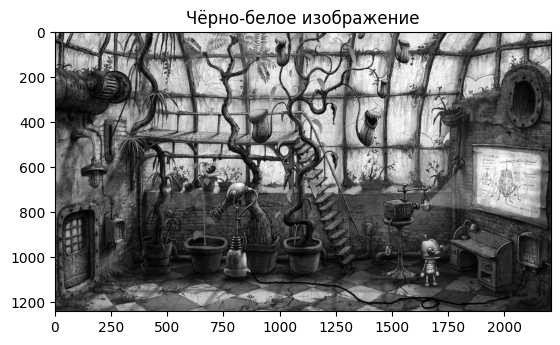

In [5]:
gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
gray = gray.astype(np.uint8)
plt.imshow(gray, cmap='gray')
plt.title("Чёрно-белое изображение")
plt.show()

## 🧮  4: Сжатие (уменьшение разрешения)

### Задание 4.1: Уменьшите изображение в 2 раза по каждой оси

- Используйте срезы с шагом: `img[::2, ::2]`
- Это простейший способ "даунсэмплинга".

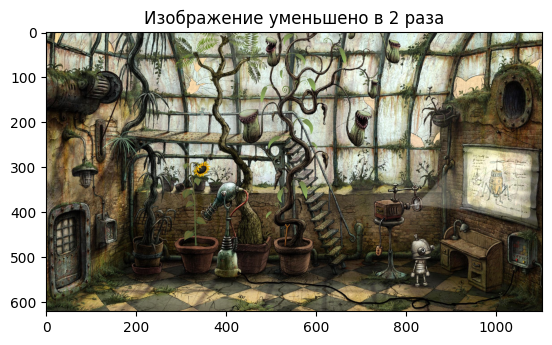

In [6]:
small_img = img[::2, ::2]
plt.imshow(small_img)
plt.title("Изображение уменьшено в 2 раза")
plt.show()

## 🚫 5: Затирание (зануление) поля на изображении

### Задание 5.1: Затрите прямоугольную область на изображении

- Выберите координаты прямоугольника .
- Присвойте всем пикселям в этом участке значение `[0, 0, 0]` (чёрный).
